# **EYE DETECTION**

# **i. Introduction**

**Objective:** 

The goal is to create a machine learning model with the ability to accurately classify images of human eyes. The model checks whether the eyes are open or closed. This model can serve as a foundational component for real-life applications, such as drowsiness detection systems.

**Data Overview:** 

The dataset used is generated using MRL and Closed Eyes in Wild (CEW) combined with a personal database from the uploader. The data consists of images showing opened and closed eyes that were taken under various conditions, including diverse lighting conditions, distance, and angle. The current version used is the 4th version which contains a total of 4000 images. The data is balanced between opened and closed eyes images with a total 2000 images for each case.

**Dataset Link**: https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset/data

**Deployment Link**: https://huggingface.co/spaces/thalibanallaam/EyeDetection

# **ii. Import Libraries**

In [36]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **iii. Load Files**

In [37]:
model_path = "model_new.keras"
model = load_model(model_path)

# **iv. New Data**

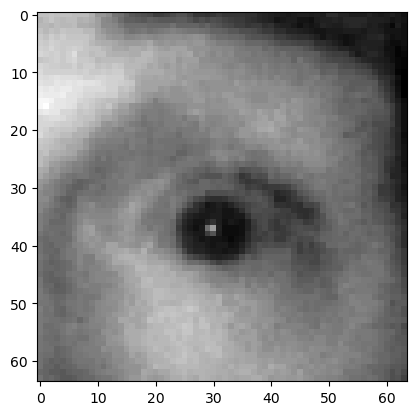

In [38]:
# Preview image
image_path = "data\Open_Eyes\s0001_02336_0_0_1_0_0_01.png" 

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=0)  # Batch dimension
img = np.expand_dims(img, axis=-1)  # Channel dimension
img = img / .255  # Normalize pixel values
    

# Display the image
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.show()

In [39]:
def predict_eye_state(image_path):
    
    img = cv2.imread(image_path, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))

    img = np.expand_dims(img, axis=0)  # Batch dimension
    img = np.expand_dims(img, axis=-1)  # Channel dimension

    img = img / .255  # Normalize pixel values
    
    prediction = model.predict(img)
    
    print("Raw prediction output:", prediction)

    if prediction > 0.5:
        return 'Open Eyes'
    else:
        return 'Closed Eyes'

# **v. Prediction**

In [40]:
image_path = "data\Open_Eyes\s0001_02336_0_0_1_0_0_01.png" 

predicted_state = predict_eye_state(image_path)
print(f"Predicted eye state: {predicted_state}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Raw prediction output: [[0.9487107]]
Predicted eye state: Open Eyes
